## Trabajo final: Datos de encuestas sobre compras en Asia
#### Trabajo realizado por Lucía Serrato Roldán

Para llevar a cabo este proyecto, he utilizado un archivo csv donde aparecen datos sobre el género, la edad, la ciudad y datos económicos.

In [2]:
import csv
from collections import namedtuple
from matplotlib import pyplot as plt

## FUNCIÓN DE LECTURA

###### Primero realizaremos la función de lectura, en primer lugar de manera tradicional y en segundo lugar por una namedtuple.

In [3]:
lista_compra=[]
def lee_listacompra(fichero):
    with open (fichero, encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        for linea in lector:
            tupla=(linea[0],linea[1],int(linea[2]),linea[3],linea[4],int(linea[5]),int(linea[6]))
            lista_compra.append(tupla)
    return lista_compra

In [4]:
encuesta=lee_listacompra("encuestas_compras.csv")
print(encuesta[:10])

[('1001', 'Male', 49, 'Bengaluru', '527547.5885', 653, 78), ('1002', 'Male', 59, 'Bengaluru', '207143.1976', 630, 63), ('1003', 'Female', 54, 'Delhi', '164423.8457', 555, 69), ('1004', 'Female', 42, 'Bengaluru', '56220.36443', 699, 30), ('1005', 'Female', 30, 'Bengaluru', '256194.3619', 793, 6), ('1006', 'Female', 38, 'Chennai', '475324.8903', 635, 97), ('1007', 'Female', 45, 'Chennai', '186352.3482', 881, 2), ('1008', 'Female', 23, 'Mumbai', '414233.1569', 852, 77), ('1009', 'Male', 59, 'Chennai', '97263.51748', 708, 22), ('1010', 'Female', 48, 'Kolkata', '179271.2332', 669, 97)]


In [5]:
Registro = namedtuple('Registro',  'numero_identidad,genero,edad,ciudad,record_dinero,record_gastos')
def lectura_datos2(fichero):
    with open (fichero, 'r', encoding='utf-8') as f:
        registros=[]
        lector=csv.reader(f)
        next(lector)
        for numero_identidad, genero, edad, ciudad, record_dinero, record_gastos in lector:
            tupla=Registro(int(numero_identidad),genero,int(edad),ciudad,int(record_dinero),int(record_gastos))
            #tupla=Registro(int(numero_identidad),genero,int(edad),ciudad,int(record_dinero),int(record_gastos))
            registros.append(tupla)
    return registros

## FUNCIÓN DE TRUNCADO

Para saber de cuántos países diferentes son los participantes de la encuesta, definiremos una función que nos cree una lista de los países. Al crear un conjunto, nos aparecerán todos los países sin repetirse.

In [6]:
def calcula_ciudades(encuesta):
    lista_ciudades=[]
    for tupla in encuesta:
        paises=tupla[3]
        lista_ciudades.append(paises)
    return lista_ciudades
  

Probamos nuestra funcion:

In [7]:
ciudades=calcula_ciudades(encuesta)
print(ciudades)

['Bengaluru', 'Bengaluru', 'Delhi', 'Bengaluru', 'Bengaluru', 'Chennai', 'Chennai', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Bengaluru', 'Delhi', 'Mumbai', 'Bengaluru', 'Kolkata', 'Bengaluru', 'Mumbai', 'Mumbai', 'Kolkata', 'Chennai', 'Bengaluru', 'Kolkata', 'Mumbai', 'Bengaluru', 'Chennai', 'Kolkata', 'Bengaluru', 'Delhi', 'Chennai', 'Bengaluru', 'Bengaluru', 'Chennai', 'Kolkata', 'Chennai', 'Delhi', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Bengaluru', 'Bengaluru', 'Kolkata', 'Delhi', 'Kolkata', 'Bengaluru', 'Mumbai', 'Chennai', 'Chennai', 'Kolkata', 'Bengaluru', 'Kolkata', 'Mumbai', 'Kolkata', 'Delhi', 'Bengaluru', 'Bengaluru', 'Mumbai', 'Bengaluru', 'Mumbai', 'Delhi', 'Bengaluru', 'Bengaluru', 'Bengaluru', 'Chennai', 'Mumbai', 'Delhi', 'Chennai', 'Mumbai', 'Bengaluru', 'Bengaluru', 'Kolkata', 'Mumbai', 'Delhi', 'Chennai', 'Delhi', 'Bengaluru', 'Chennai', 'Chennai', 'Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Delhi', 'Mumbai', 'Bengaluru', 'Chennai', 'Delhi', 'Delhi', 'D

Ahora transformamos nuestra lista en un conjunto:

In [8]:
conjuntociudades=set(ciudades)
print(conjuntociudades)


{'Bengaluru', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'}


In [9]:
print("Participaron personas de", len(conjuntociudades), "ciudades")

Participaron personas de 5 ciudades


def filtrar_por_genero(encuesta, genero='Female'):
    listagenero=[]
    if encuesta is not None:
        encuesta=filtrar_por_genero(encuesta, genero='Female')
    for linea in encuesta:
        if linea[1]==genero:
            listagenero=listagenero.append(linea)
    return listagenero
    



listamujeres=filtrar_por_genero(encuesta)

Para ver cuántas mujeres y cuántos hombres han participado:

## FUNCIÓN GRÁFICA

Primero filtramos la lista para ver edades de la encuesta:

In [10]:
lista_edad=[]
def lee_edad(fichero):
    
    with open (fichero, encoding='utf-8') as f:
        lector = csv.reader(f)
        next(lector)
        for linea in lector:
            tupla=(int(linea[2]))
            lista_edad.append(tupla)
        return lista_edad

Después creamos una lista de edad desde el fichero de encuesta:

In [11]:
listaedades=lee_edad('encuestas_compras.csv')
print(listaedades [:50])

[49, 59, 54, 42, 30, 38, 45, 23, 59, 48, 55, 73, 54, 34, 54, 53, 23, 30, 37, 52, 39, 38, 71, 31, 42, 65, 65, 33, 29, 24, 59, 40, 52, 47, 66, 62, 73, 23, 45, 43, 21, 45, 54, 22, 26, 72, 29, 65, 34, 26]


In [12]:
conjuntoedades=set(listaedades)
print("Hay ", len(conjuntoedades), "edades diferentes")

Hay  58 edades diferentes


# GRÁFICO:

Realizamos un gráfico con la lista de edades:

In [13]:
def grafico_edad(lista_edad):

    intervalos = [10,20,30, 40, 50, 60, 70,80] #indicamos los extremos los intervalos de edad
    #hasta 10, de 10 a 20, de 20 a 30,.... mayores de 80
    
    plt.hist(x=lista_edad, bins=intervalos, color='blue', rwidth=0.85)
    plt.title('Gráfico de edades encuesta')
    plt.xlabel('Edades')
    plt.ylabel('Frecuencia')
    plt.xticks(intervalos)
    
    plt.show()

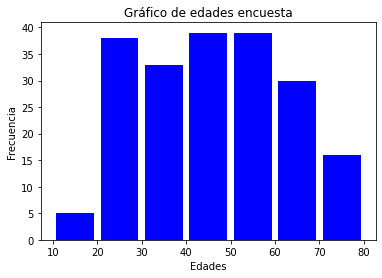

In [14]:
grafico_edad(lista_edad)

## Funciones relacionadas con los datos:

In [15]:
def calcula_maximo(listaedades):
    edadmaxima=[]
    for e in listaedades:
        if e==max(listaedades):
            edadmaxima.append(e)
    return edadmaxima

calcula_maximo(listaedades)

[75]

In [16]:
def calcula_media(listaedades):
    totaledades=sum(listaedades)
    mediaedad=totaledades/len(listaedades)
    return mediaedad

calcula_media(listaedades)


45.52